In [42]:
import pandas as pd
import numpy as np

# Read the csv data files
movies_df = pd.read_csv("movies.csv")
ratings_df = pd.read_csv('ratings.csv')


In [43]:
# Print the top 5 values of movies dataframe
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [44]:
# Print the top 5 values of ratings dataframe
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [45]:
# Calculate the unique users in the dataset
unique_users = ratings_df.UserID.nunique(dropna = True)
print("Number of unique user:", unique_users)

# Calculate the unique movies in the dataset
unique_movies = ratings_df.MovieID.nunique(dropna = True)
print("Number of unique movies:", unique_movies)

Number of unique user: 610
Number of unique movies: 9724


In [46]:
# Creating item user matrix


total_ratings = unique_users*unique_movies
rating_present = ratings_df.shape[0]
no_ratings = total_ratings - rating_present 

print("Sum of total movies not rated each user : ", no_ratings)
print("Sparsity of user-item matrix is : ", no_ratings / total_ratings)

Sum of total movies not rated each user :  5830804
Sparsity of user-item matrix is :  0.9830003169443864


In [47]:
#Data Exploration for Ratings
# most of the movies are rated very rarely ..
# remove those movies which are rated less than 25 times.

# this rating count doesn't have count of rating 0
rating_count = pd.DataFrame(ratings_df.groupby('Rating').size(),columns=['count'])
print('Ratings count which gives information about which rating (on scale of 0 t0 5) is more frequent:')
print(rating_count, '\n')

# append rating count for rating 0
rating_count= rating_count.append(pd.DataFrame({'count':no_ratings},index = [0])).sort_index()
print('Ratings count with appending the rating not provided values :')
print(rating_count, '\n')

Ratings count which gives information about which rating (on scale of 0 t0 5) is more frequent:
        count
Rating       
0.5      1370
1.0      2811
1.5      1791
2.0      7551
2.5      5550
3.0     20047
3.5     13136
4.0     26818
4.5      8551
5.0     13211 

Ratings count with appending the rating not provided values :
       count
0.0  5830804
0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211 



In [48]:
# No of times the movie has been rated
movie_freq = pd.DataFrame(ratings_df.groupby('MovieID').size(),columns=['count'])

print('Frequency count of each movie rated : ')
movie_freq.head()

Frequency count of each movie rated : 


,count
MovieID,
1,215
2,110
3,52
4,7
5,49


In [49]:
# From data analysis in excel, we calculated the threshold value of rating
# frequency which is the movies with less ratings frequency.
threshold_rating = 25

# First take out the movie id  for which movie is rated more than threshold value
# than keep only this movies in our original ratings dataframe

# Original Dataset has shape of (10325,1)
print('Shape of the movies frequency : ', movie_freq.shape)

# Reduced Dataset has shape of (1064,1)
print('Shape of the movies with frequency more than threshold rating: ', movie_freq.query('count>= @threshold_rating').shape)

popular_moviesId = list(set(movie_freq.query('count>=@threshold_rating').index))

# Ratings after dropping non popular movies
ratings_with_popular_movies = ratings_df[ratings_df.MovieID.isin(popular_moviesId)]

print("No of unique movies present in dataset : ", unique_movies)
print("No of movies which are rated more than 10 times : ", len(popular_moviesId))
print('Shape of the ratings : ', ratings_df.shape)
print('Shape of ratings with popular movies : ', ratings_with_popular_movies.shape)

Shape of the movies frequency :  (9724, 1)
Shape of the movies with frequency more than threshold rating:  (1050, 1)
No of unique movies present in dataset :  9724
No of movies which are rated more than 10 times :  1050
Shape of the ratings :  (100836, 4)
Shape of ratings with popular movies :  (62518, 4)


In [50]:
# From the plot we can interpret that, there are very few users who are interested 
# in giving rating to movies, thus find out the users who gives rating more than 25 times.

# No of movies rated by the each user
user_freq = pd.DataFrame(ratings_df.groupby('UserID').size(),columns=['count'])

print('Frequency movies rated by each users : ')
user_freq.head()

Frequency movies rated by each users : 


,count
UserID,
1,232
2,29
3,39
4,216
5,44


In [51]:
# From data analysis in excel, we calculated the threshold value of rating
# frequency which is the movies with less ratings frequency.

threshold_user = 25
active_user = list(set(user_freq.query('count>=@threshold_user').index))

# Update your ratings with popular movies
ratings_with_popular_movies_with_active_user = ratings_with_popular_movies[ratings_with_popular_movies.UserID.isin(active_user)]

print('Dimensions of ratings with Popular Movies : ', ratings_with_popular_movies.shape)
print('Dimensions of ratings with Popular Movies with Active User : ', ratings_with_popular_movies_with_active_user.shape)
print("Unique User : ", unique_users)
print("Active User : ", len(active_user))
print("Unique Movies : ", unique_movies)
print("Popular Movies : ", len(popular_moviesId))

Dimensions of ratings with Popular Movies :  (62518, 4)
Dimensions of ratings with Popular Movies with Active User :  (61433, 4)
Unique User :  610
Active User :  547
Unique Movies :  9724
Popular Movies :  1050


In [52]:
# Print the top 5 values of ratings dataframe
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [53]:
# Generate an R dataframe using pivot tables
# where Rows=Users and Columns=Movies, data=Ratings
R_df = ratings_df.pivot(index = 'UserID', columns ='MovieID', values = 'Rating')
R_df.head()

# Calculate the mean ratings given by each user
users_mean=np.array(R_df.mean(axis=1))

# Fill up the NAN values of data with mean value inorder to keep the mean constant.
R_df=R_df.fillna(R_df.mean())

# Generate a Dataframe where each data had been subtracted by mean value of user
R_demean=R_df.sub(R_df.mean(axis=1), axis=0)

In [54]:
n_users =int(max(ratings_df.UserID))
n_items =int(max(ratings_df.MovieID))

In [55]:
from sklearn.model_selection import cross_validate as cv
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(ratings_df, test_size=0.3)

In [56]:
test_data.head()

,UserID,MovieID,Rating,Timestamp
79337,492,653,4.0,863976055
11458,68,67087,3.5,1240092690
91866,596,3094,4.0,1535832727
61488,405,6807,4.0,1300896094
12642,80,55765,4.0,1377308560


In [57]:
print(train_data.shape)
print(test_data.shape)

(70585, 4)
(30251, 4)


In [58]:
train_data_matrix = np.zeros((n_users, n_items))
for line in train_data.itertuples():
    a=int(line[1]-1)
    b=int(line[2]-1)
    c=line[3]
    train_data_matrix[a,b] = c

test_data_matrix = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    a=int(line[1]-1)
    b=int(line[2]-1)
    c=line[3]
    test_data_matrix[a, b] = c

In [59]:
# Create  RMSE measurement function:

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [60]:
# Generate predictions with by dot product of u,s, vt matrices of svds and measure these predictions with RMSE:
import scipy.sparse as sp
from scipy.sparse.linalg import svds

a=[40, 100, 160, 200]
b=[]

for k in a:
    u, s, vt = svds(train_data_matrix, k = k)
    s = np.diag(s)
    X_pred = np.dot(np.dot(u, s), vt) + users_mean.reshape(-1, 1)
    b.append(round(rmse(X_pred, train_data_matrix),6))
    print('RMSE for k='+ str(k) + " : " + str(b[-1]))

RMSE for k=40 : 2.210462
RMSE for k=100 : 2.737258
RMSE for k=160 : 3.022458
RMSE for k=200 : 3.15064


In [66]:
min = float('inf')
index = 0
for i in range(0,len(b)):
    if(b[i]<min):
      min = b[i]
      index = i
K = a[index]

print("a : ", a)
print("b : ", b)
print(K)

a :  [40, 100, 160, 200]
b :  [2.210462, 2.737258, 3.022458, 3.15064]
40


Text(0, 0.5, 'RMSE')

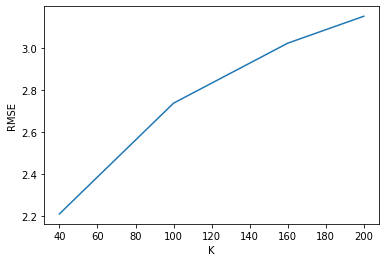

In [67]:
plt.plot(a,b)
plt.xlabel('K')
plt.ylabel('RMSE')

# Singular Value Decomposition

In [23]:
from scipy.sparse.linalg import svds
print(K)
# Number of singular values and vectors to compute. Must be 1 <= k < min(R_demean.shape).
# svds is function to convert the R_demean to U, sigma, Vt matrix.
U, sigma, Vt = svds(R_demean, k = K)

40


In [24]:
# Converts the Diagonal matrix from 2D to 1D
sigma = np.diag(sigma)

In [25]:
#Making Predictions from the Decomposed Matrices
# Calculate the predicted ratings matrix by dot product of 
# U, sigma, Vt generated with addition of users_mean matrix.
users_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + users_mean.reshape(-1, 1)
print(users_predicted_ratings)

# Convert the matrix into dataframe
predictions_df = pd.DataFrame(users_predicted_ratings, columns = R_df.columns)
print(predictions_df)

[[5.01073959 4.726177   4.77223866 ... 4.59006401 4.59006401 5.08993252]
 [4.61013001 4.1170499  3.91002897 ... 4.18549899 4.18549899 4.68562489]
 [2.93050228 2.58476267 2.45320517 ... 2.67746266 2.67746266 3.17838067]
 ...
 [1.89503775 2.06240364 1.7599785  ... 3.38494735 3.38494735 3.88508577]
 [3.84923115 3.38685629 3.18892198 ... 3.5084921  3.5084921  4.00838562]
 [5.46446095 4.07479728 3.53961601 ... 3.89769935 3.89769935 4.39732587]]
MovieID    1         2         3         4         5         6         7       \
0        5.010740  4.726177  4.772239  3.445566  4.272599  5.351227  4.248967   
1        4.610130  4.117050  3.910029  3.041033  3.779863  4.613004  3.871789   
2        2.930502  2.584763  2.453205  1.511345  2.241318  3.151580  2.382405   
3        3.851832  3.577700  3.535181  2.648861  3.380143  4.118580  3.524729   
4        4.338386  3.780780  3.540473  2.727676  3.471585  4.274814  3.547927   
..            ...       ...       ...       ...       ...       ...   

In [26]:
# test_data.head()
ratings_df.groupby("UserID").count()

,MovieID,Rating,Timestamp
UserID,,,
1,232,232,232
2,29,29,29
3,39,39,39
4,216,216,216
5,44,44,44
...,...,...,...
606,1115,1115,1115
607,187,187,187
608,831,831,831


In [27]:
predictions_df

MovieID,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
0,5.010740,4.726177,4.772239,3.445566,4.272599,5.351227,4.248967,3.920307,4.267019,4.525216,...,4.590064,4.090196,5.089933,5.089933,4.590064,5.089933,4.590064,4.590064,4.590064,5.089933
1,4.610130,4.117050,3.910029,3.041033,3.779863,4.613004,3.871789,3.559599,3.810041,4.193379,...,4.185499,3.685373,4.685625,4.685625,4.185499,4.685625,4.185499,4.185499,4.185499,4.685625
2,2.930502,2.584763,2.453205,1.511345,2.241318,3.151580,2.382405,2.066671,2.310821,2.717017,...,2.677463,2.176545,3.178381,3.178381,2.677463,3.178381,2.677463,2.677463,2.677463,3.178381
3,3.851832,3.577700,3.535181,2.648861,3.380143,4.118580,3.524729,3.164510,3.481885,3.938588,...,3.795602,3.295032,4.296172,4.296172,3.795602,4.296172,3.795602,3.795602,3.795602,4.296172
4,4.338386,3.780780,3.540473,2.727676,3.471585,4.274814,3.547927,3.245953,3.495829,3.867016,...,3.874779,3.374737,4.374822,4.374822,3.874779,4.374822,3.874779,3.874779,3.874779,4.374822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,4.706638,3.422118,3.478931,2.750970,3.358563,4.262896,3.481415,3.258106,3.493283,3.714307,...,3.892013,3.393486,4.390540,4.390540,3.892013,4.390540,3.892013,3.892013,3.892013,4.390540
606,4.067777,4.043677,4.010618,2.902684,3.689064,4.566418,3.758018,3.398465,3.691385,4.185384,...,4.019528,3.519964,4.519092,4.519092,4.019528,4.519092,4.019528,4.019528,4.019528,4.519092
607,1.895038,2.062404,1.759979,2.229145,2.619840,4.066346,2.839436,2.587952,2.981002,3.488962,...,3.384947,2.884809,3.885086,3.885086,3.384947,3.885086,3.384947,3.384947,3.384947,3.885086
608,3.849231,3.386856,3.188922,2.353710,3.070641,3.905578,3.173259,2.876296,3.129350,3.527569,...,3.508492,3.008599,4.008386,4.008386,3.508492,4.008386,3.508492,3.508492,3.508492,4.008386


In [28]:
test_data.head()

,UserID,MovieID,Rating,Timestamp
3521,21,90249,3.5,1468113329
12560,80,2959,5.0,1377308074
49855,318,176371,4.5,1517345856
45533,301,47,4.5,1211377521
65779,424,1343,4.5,1457846226


In [29]:
test_data["UserID"]
userID=[]
movieID=[]
for i in range(test_data.shape[0]):
  userID.append(test_data["UserID"].iloc[i])
  movieID.append(test_data["MovieID"].iloc[i])

In [30]:
x=[]
for i in range(test_data.shape[0]):
  x.append(predictions_df[movieID[i]][userID[i]-1])

In [31]:
a=[]
for i in range(test_data.shape[0]):
  if (predictions_df[movieID[i]][userID[i]-1] < 3):
    a.append(0)
  else:
    a.append(1)
  # a.append(predictions_df[movieID[i]][userID[i]-1])

In [32]:
b=[]
for i in range(test_data.shape[0]):
  if (test_data["Rating"].iloc[i]<3):
    b.append(0)
  else:
    b.append(1)  

In [33]:
test_data["predictions"]=x
test_data["predictions_binary"]=a
test_data["original_ratings_binary"]=b

In [34]:
test_data.head()

,UserID,MovieID,Rating,Timestamp,predictions,predictions_binary,original_ratings_binary
3521,21,90249,3.5,1468113329,3.180785,1,1
12560,80,2959,5.0,1377308074,5.448606,1,1
49855,318,176371,4.5,1517345856,4.347388,1,1
45533,301,47,4.5,1211377521,3.865150,1,1
65779,424,1343,4.5,1457846226,4.228227,1,1


In [35]:
truth=0
false=0
for i in range(test_data.shape[0]):
  if a[i]==b[i]:
    truth+=1
  else:
    false+=1

accuracy=truth*100/(truth+false)
print(accuracy)

88.4664969753066


In [36]:
# Movie recommendation function with arguments:
# 1. Predictions_df is the prediction dataframe
# 2. userID is the userID of the user for which movies to be recommended.
# 3. movies_df is the movies dataframe from the dataset.
# 4. rating_df is the original rating dataframe from the dataset.
# 5. variable to store the number of movies to be recommended.

def recommend_movies(predictions_df, userID, movies_df, ratings_df, n_recommendations=5):
    
    # Get user ID as per row.
    user_row = userID - 1
    
    # Get the user predictions from prediction dataframe in descending order.
    user_predictions = predictions_df.iloc[user_row].sort_values(ascending=False)
    
    # Get the user's data and merge with the movie information such as Title and Genres.
    user_data = ratings_df[ratings_df.UserID == (userID)]
    user_full_data = (user_data.merge(movies_df, how = 'left', left_on = 'MovieID', right_on = 'MovieID').
                     sort_values(['Rating'], ascending=False)
                 )

    print('User {0} has already rated {1} movies.'.format(userID, user_full_data.shape[0]))
    print('Recommending the highest {0} predicted ratings movies that are not rated.'.format(n_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies_df[~movies_df['MovieID'].isin(user_full_data['MovieID'])].
                       merge(pd.DataFrame(user_predictions).reset_index(), how = 'left',
                             left_on = 'MovieID', right_on = 'MovieID').
                       rename(columns = {user_row: 'Predictions'}).
                       sort_values('Predictions', ascending = False).
                       iloc[:n_recommendations, :-1]
                      )

    return user_full_data, recommendations

previous_rated, recommended_movies = recommend_movies(predictions_df, 50, movies_df, ratings_df, 10)

User 50 has already rated 310 movies.
Recommending the highest 10 predicted ratings movies that are not rated.


In [37]:
# The top 10 movies rated by the user
previous_rated.head(10)

,UserID,MovieID,Rating,Timestamp,Title,Genres
21,50,924,4.5,1514238077,2001: A Space Odyssey (1968),Adventure|Drama|Sci-Fi
33,50,1204,4.5,1526329645,Lawrence of Arabia (1962),Adventure|Drama|War
35,50,1208,4.5,1527106159,Apocalypse Now (1979),Action|Drama|War
40,50,1251,4.5,1534178801,8 1/2 (8½) (1963),Drama|Fantasy
121,50,7327,4.0,1525359178,Persona (1966),Drama
28,50,1136,4.0,1514238006,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy
31,50,1199,4.0,1527799718,Brazil (1985),Fantasy|Sci-Fi
32,50,1201,4.0,1536870006,"Good, the Bad and the Ugly, The (Buono, il bru...",Action|Adventure|Western
39,50,1232,4.0,1518012173,Stalker (1979),Drama|Mystery|Sci-Fi
41,50,1252,4.0,1523039137,Chinatown (1974),Crime|Film-Noir|Mystery|Thriller


In [38]:
# The recommended movies to the user
recommended_movies

,MovieID,Title,Genres
5511,27523,My Sassy Girl (Yeopgijeogin geunyeo) (2001),Comedy|Romance
8640,134796,Bitter Lake (2015),Documentary
7051,73822,Meantime (1984),Comedy|Drama
4474,6818,Come and See (Idi i smotri) (1985),Drama|War
4479,6835,Alien Contamination (1980),Action|Horror|Sci-Fi
7012,72692,Mickey's Once Upon a Christmas (1999),Animation|Comedy|Fantasy
8671,136341,Scooby-Doo! and the Samurai Sword (2009),Animation|Children|Comedy
8672,136353,Scooby-Doo! and the Loch Ness Monster (2004),Animation|Children|Comedy
8673,136355,Big Top Scooby-Doo! (2012),Animation|Children|Comedy
8674,136359,Scooby-Doo Goes Hollywood (1979),Animation|Children|Comedy
